In [1]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [13]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [14]:
# Convert the target variable into categorical if needed
# For example, we can define Sales > 8 as high and <= 8 as low sales
y = (y > 8).astype(int)


In [16]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(x_test)

In [21]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy.round(2))
classification_report = classification_report(y_test, y_pred)
print('Classification Report:\n',classification_report)

Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66        65
           1       0.59      0.53      0.56        55

    accuracy                           0.62       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.61      0.62      0.61       120



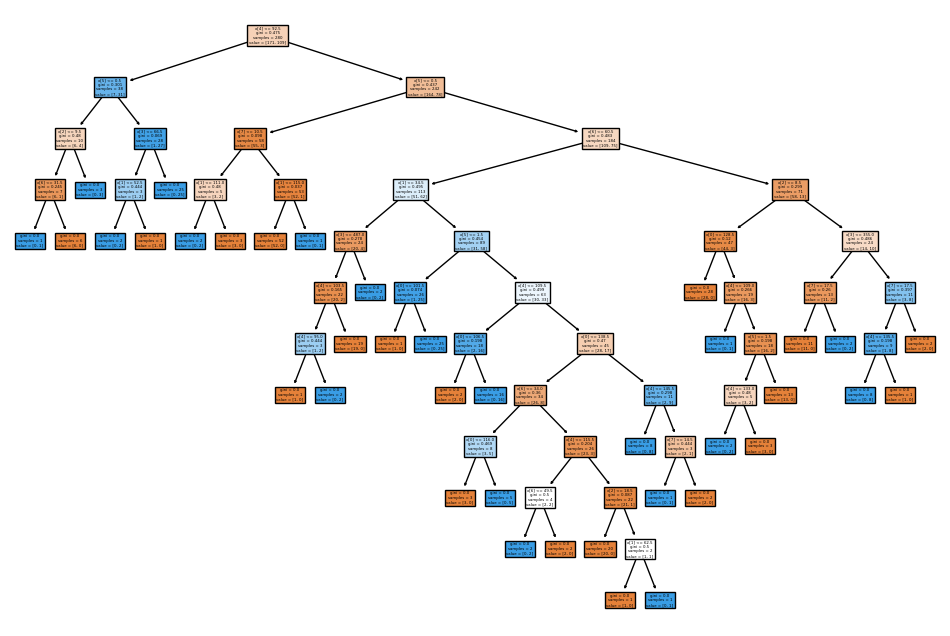

In [25]:
# printing decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True)
plt.show()

In [31]:
!pip install pydotplus
!pip install graphviz

In [32]:
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image

In [33]:
import os
os.getcwd()

'/content'

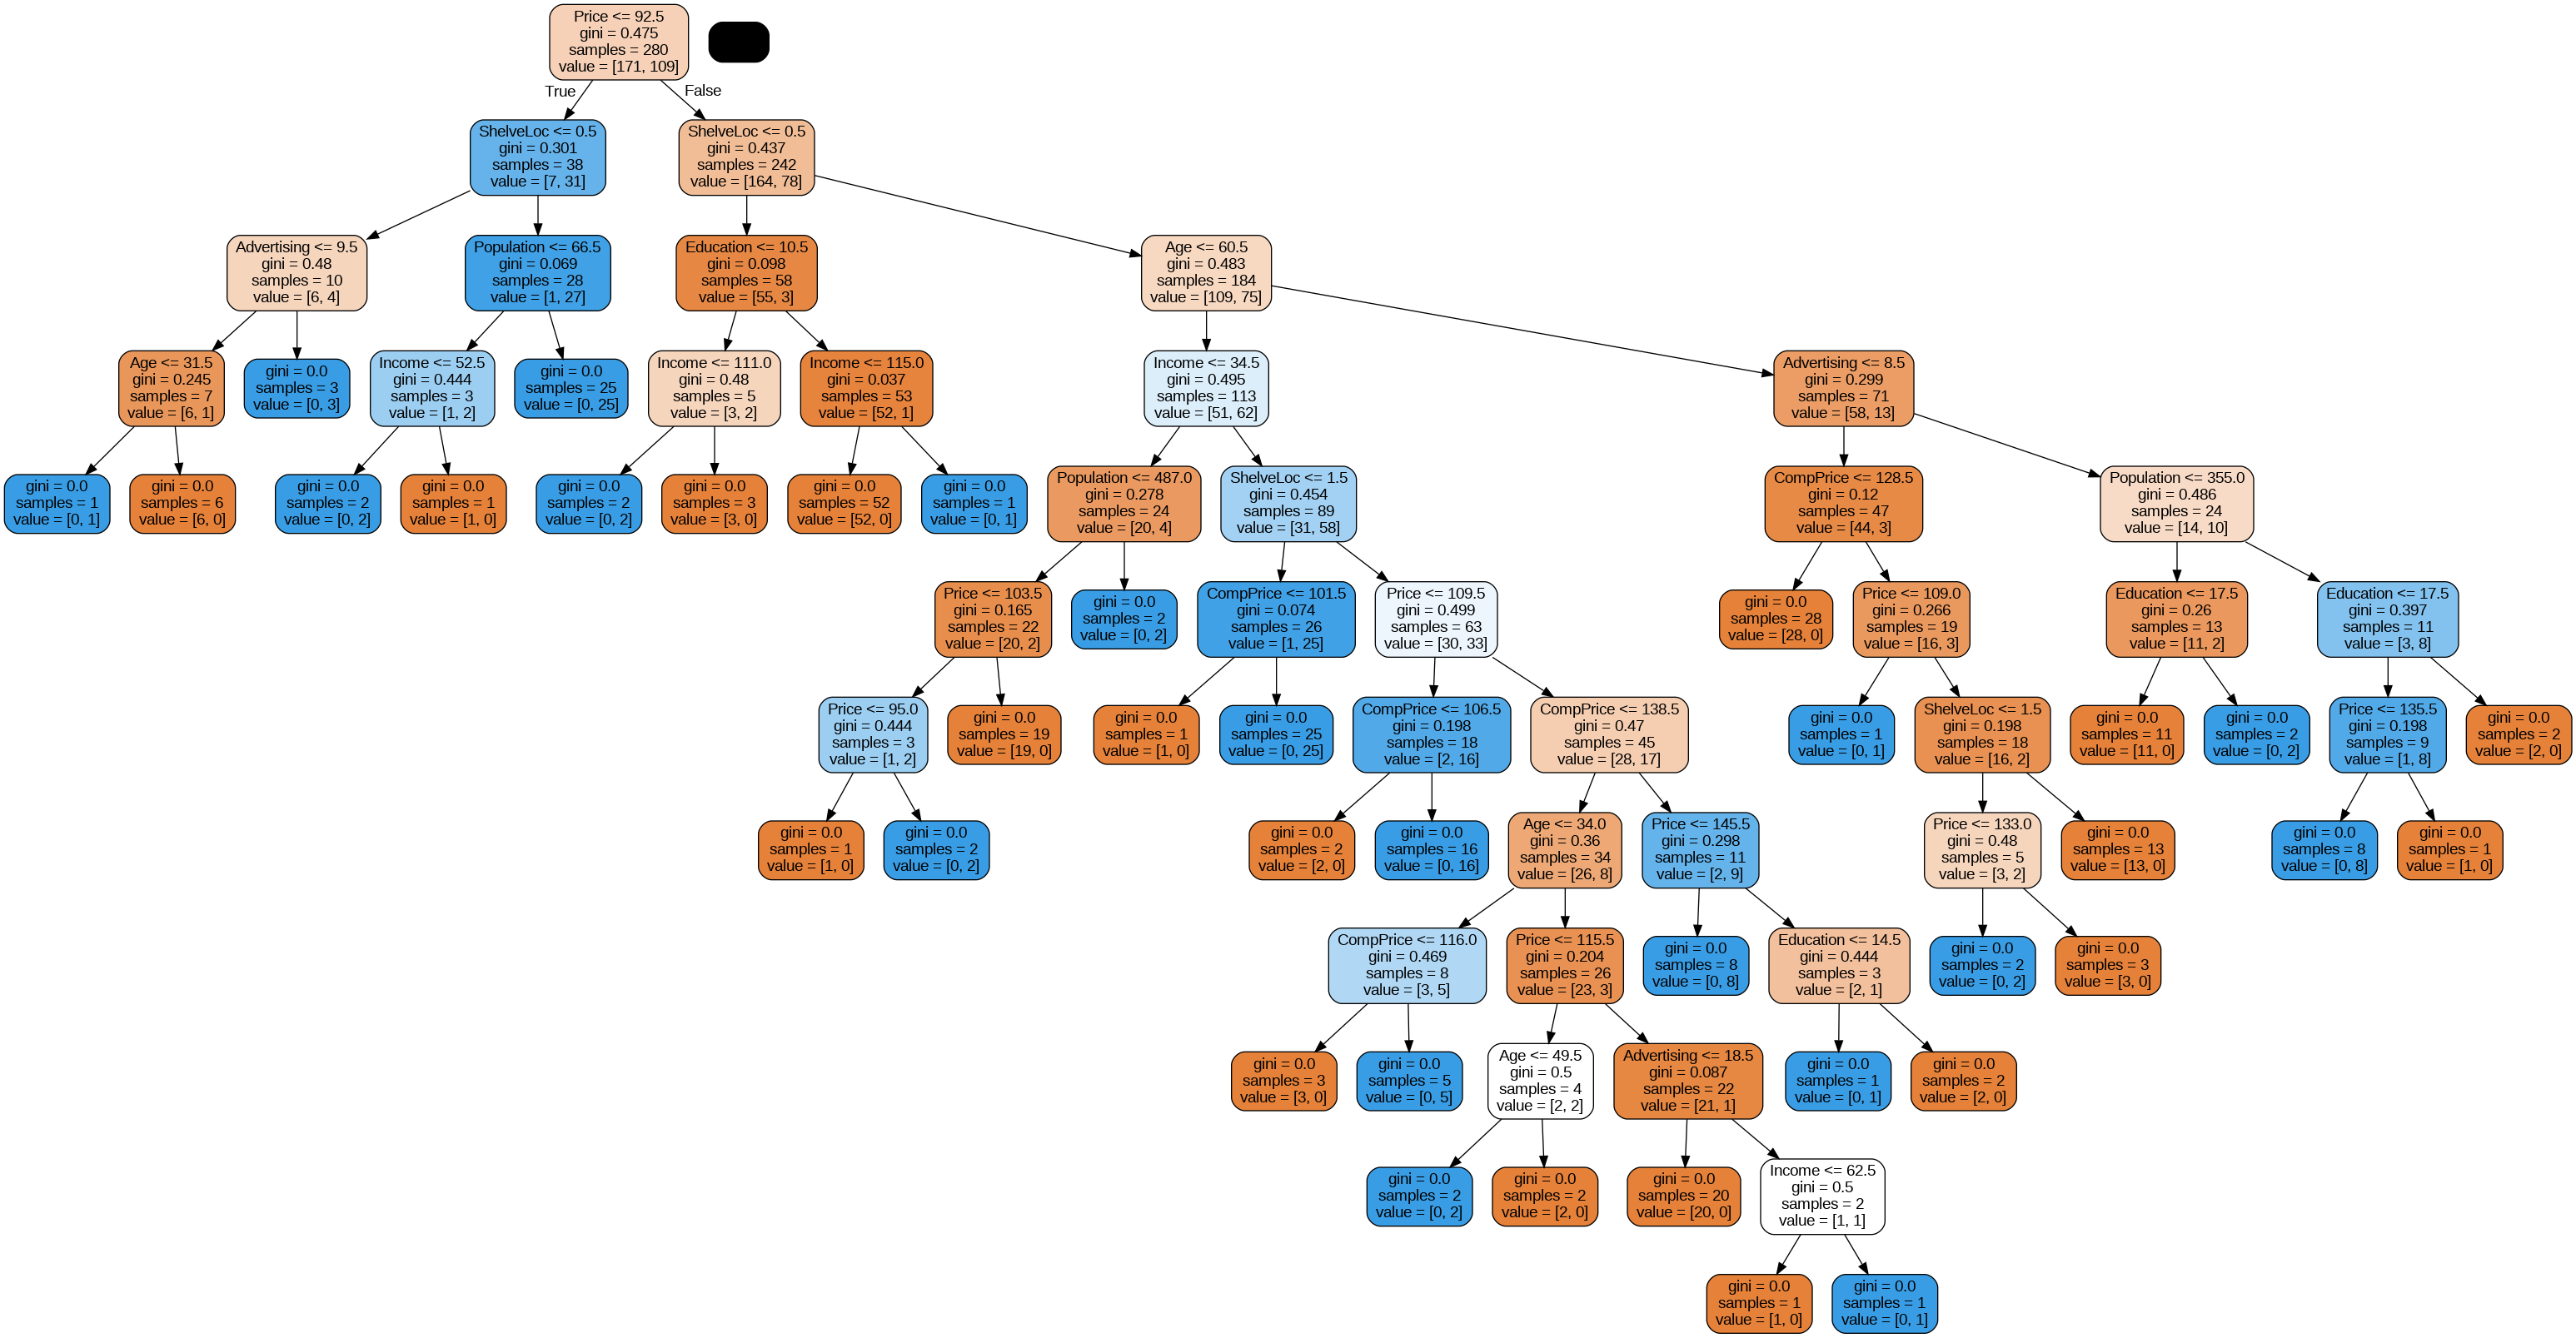

In [34]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [35]:
# create Decision Tree classifier object
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

dt1 = dt1.fit(x_train, y_train)


In [36]:
y_pred1 = dt1.predict(x_test)

In [37]:
print('Accuracy:', accuracy_score(y_test, y_pred1).round(2))

Accuracy: 0.62
